# Mugloest - 6 ADCP Experiment (March, 2013) 
# Design and testing the low pass filter

This was originally made in the Muglo_6adcp_Figura4 notebook, and latter 'isolated' here for reference  
The figures, specially for neap tide results, were too noisy...


# Filter design
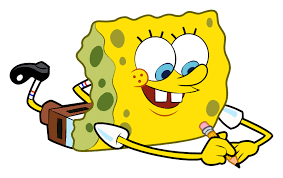

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from pprint import pprint
import seawater as sea
import scipy.signal as signal

In [3]:
with open('Muglo_6ADCP_CT_dic.pkl', 'rb') as io:
    dic = pickle.load(io)

In [4]:
for c in dic:
    print(c)
print('')
for c in dic['neap']:
    print(c)
print('')
for c in dic['neap']['PF']:
    print(c)
print('')
for c in dic['neap']['PF']['surface']:
    print(c)

neap
spring

Praticagem
PF
Hospital
Rampa
Bombeiros
JoanaBezerra

time
pressure
temperature
time2d
z2d
currents2d
surface
bottom

temperature
salinity
density


## To extract the data from the dictionary to work with lists

In [5]:
# get the content of the dictionarly and create a list
def get_vars(campaign, station):
    time2d = dic[campaign][station]['time2d']
    z2d =    dic[campaign][station]['z2d']
    curr =   dic[campaign][station]['currents2d']  *-1 # Arnoldo's convention
    press =  dic[campaign][station]['pressure']
    time =   dic[campaign][station]['time']
    temp_s = dic[campaign][station]['surface']['temperature']
    sal_s =  dic[campaign][station]['surface']['salinity']
    temp_f = dic[campaign][station]['bottom']['temperature']
    sal_f =  dic[campaign][station]['bottom']['salinity']
    rho_s =  dic[campaign][station]['surface']['density']
    rho_f =  dic[campaign][station]['bottom']['density']

    bunch = [time2d, z2d, curr, time, press, temp_s, sal_s, temp_f, sal_f, rho_s, rho_f]
    return bunch

s1 = get_vars('spring', 'Praticagem')
n1 = get_vars('neap', 'Praticagem')

s2 = get_vars('spring', 'PF')
n2 = get_vars('neap', 'PF')

s3 = get_vars('spring', 'Bombeiros')
n3 = get_vars('neap', 'Bombeiros')

s4 = get_vars('spring', 'Hospital')
n4 = get_vars('neap', 'Hospital')

s5 = get_vars('spring', 'Rampa')
n5 = get_vars('neap', 'Rampa')

s6 = get_vars('spring', 'JoanaBezerra')
n6 = get_vars('neap', 'JoanaBezerra')

# coloca a ordem utilizada no artigo do Arnoldo 
# Praticagem, PF, Hospital, Rampa

N = [n1, n2, n4, n5]
S = [s1, s2, s4, s5]

CPS = [N, S] # campanhas

In [6]:
N[0][3][1] - N[0][3][0]

datetime.timedelta(seconds=600)

#### I tested several cut frequency... 2 hours looks the best by visual inspection 

In [12]:
# removing high frequency oscillations

dt = 600    # 10 minutes in seconds
fs = 1/dt   # frequency of sampling
fc = 1/7200 # cut frequency 2 hours
fn = fs/2   # Nyquist frequency
fc_norm = fc / fn

b, a = signal.butter(N=4, Wn = fc_norm, btype = 'lowpass')

In [8]:
1/fc_norm

6.0

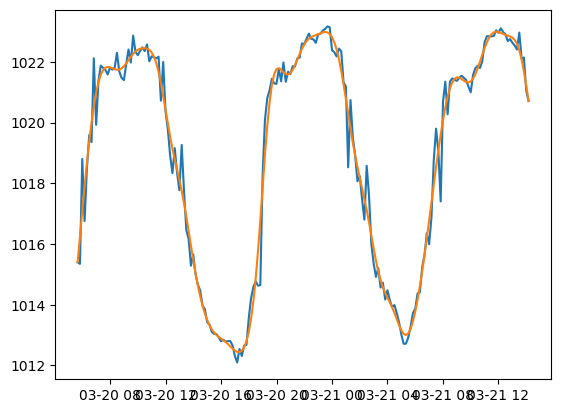

In [9]:
time = N[0][3]
sig = N[0][9]

sig_f = signal.filtfilt(b, a, sig)

plt.plot(time, sig)
plt.plot(time, sig_f)

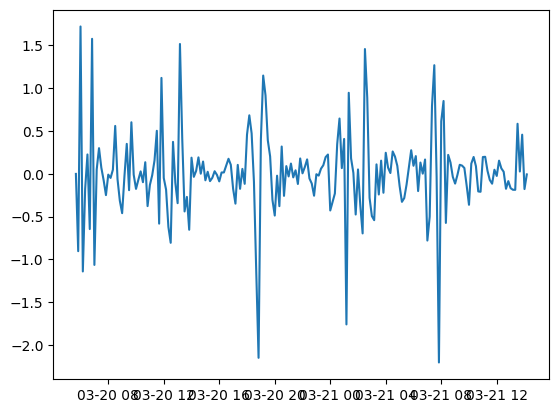

In [14]:
hf_signal = sig - sig_f
plt.plot(time, hf_signal)

# FFT
just to check if there is something interesting...  
https://gutoschettini.github.io/Ocean-Data-Analysis-Python/06_FFT_power_spectrum.html


In [13]:
# making a function...
def do_fft(signal, sampling_interval = 1):
#     sinal = n1
#     intervalo_amostral = 1
    sampling_frequency = 1/sampling_interval

    n_samples = len(signal)

    Fourier_transform = np.fft.fft(signal)/n_samples        
    Fourier_transform = Fourier_transform[range(int(n_samples/2))]

    values = np.arange(int(n_samples/2))
    time_period = n_samples / sampling_frequency
    frequencies = values / time_period
    
    return frequencies, abs(Fourier_transform)

Text(0.5, 0, 'Cycles per minute')

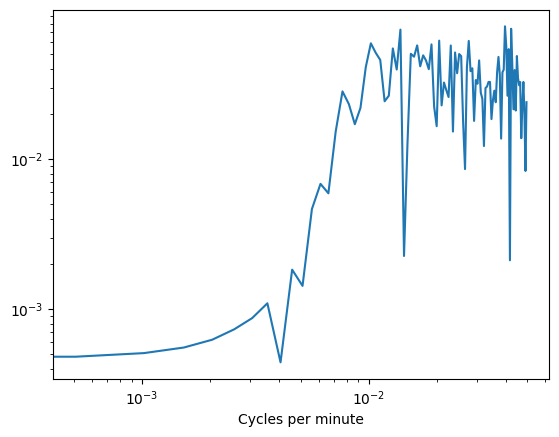

In [18]:
f, tf = do_fft(hf_signal, sampling_interval = 10)

plt.loglog(f, tf)
plt.xlabel('Cycles per minute')